# Final Project Part 3

Following discoveries in part 2, I have reformatted the data being used in the model, exchanging flags for counts where possible (including the taget variable), including email received counts both prior and recent. Following advice I will also be using the full dataset of close to a million rows in the model

## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.metrics
from pathlib import Path

%matplotlib inline

## Import data

In [2]:
engagement_raw = pd.read_csv('engagement_full.csv')

In [3]:
engagement_raw.head(5)

,email,launch_id,cellcode,date_launched,region,is_academic_email,is_china_recipient,prior_received,recent_received,prior_responses,recent_responses,prior_submissions_subject,prior_submissions_discipline,recent_submissions_subject,recent_submissions_discipline,has_precise_code_match,codes_in_discipline,engagements,engaged
0,00008394@ufrgs.br,92170,HOUSE,3/30/2019,UK,0,0,189,16,9,0,0,0,0,0,0,1,0,0
1,00010389@whu.edu.cn,92170,HOUSE,3/30/2019,APAC,1,1,6,7,0,0,0,0,0,0,0,1,0,0
2,000903@nuist.edu.cn,92170,HOUSE,3/30/2019,APAC,1,1,2,3,0,0,0,2,0,2,0,1,0,0
3,001_xiangyang@tongji.edu.cn,92170,HOUSE,3/30/2019,APAC,1,1,155,23,15,0,0,3,0,0,0,1,0,0
4,006579@yzu.edu.cn,92170,ST,3/30/2019,APAC,1,1,75,36,69,30,0,3,0,0,0,1,0,0


### Check target variables

In [4]:
engagement_raw.loc[:, 'engagements'].value_counts()

0     732687
1     187780
2       8946
3       1170
4        324
8        297
9        269
10       249
7        203
6        154
5        154
11       144
12        67
13        16
14         9
16         2
Name: engagements, dtype: int64

Having brought in the number of engagements for a given campaign rather than simply whether there was engagement, it seems as though 95% of engagers have a single engagement, so it may be that the small proportion of those with multiple engagements could cause noise. I will separate the data into two sets, one using engagements, one using engaged, to determine which will perform better

   ### Create Datasets

In [5]:
engagements = engagement_raw.drop(['email','launch_id', 'date_launched', 'engaged'], axis='columns')

In [3]:
engaged = engagement_raw.drop(['email','launch_id', 'date_launched', 'engagements'], axis='columns')

## Explore data

In [8]:
engaged.shape

(932471, 15)

A total of 932,471 records and 15 attributes (14 potential features, 1 potential target variable)

In [9]:
engaged.index

RangeIndex(start=0, stop=932471, step=1)

In [11]:
engaged.columns

Index(['cellcode', 'region', 'is_academic_email', 'is_china_recipient',
       'prior_received', 'recent_received', 'prior_responses',
       'recent_responses', 'prior_submissions_subject',
       'prior_submissions_discipline', 'recent_submissions_subject',
       'recent_submissions_discipline', 'has_precise_code_match',
       'codes_in_discipline', 'engaged'],
      dtype='object')

In [12]:
engaged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932471 entries, 0 to 932470
Data columns (total 15 columns):
cellcode                         932471 non-null object
region                           932471 non-null object
is_academic_email                932471 non-null int64
is_china_recipient               932471 non-null int64
prior_received                   932471 non-null int64
recent_received                  932471 non-null int64
prior_responses                  932471 non-null int64
recent_responses                 932471 non-null int64
prior_submissions_subject        932471 non-null int64
prior_submissions_discipline     932471 non-null int64
recent_submissions_subject       932471 non-null int64
recent_submissions_discipline    932471 non-null int64
has_precise_code_match           932471 non-null int64
codes_in_discipline              932471 non-null int64
engaged                          932471 non-null int64
dtypes: int64(13), object(2)
memory usage: 106.7+ MB


In [14]:
engaged.dtypes

cellcode                         object
region                           object
is_academic_email                 int64
is_china_recipient                int64
prior_received                    int64
recent_received                   int64
prior_responses                   int64
recent_responses                  int64
prior_submissions_subject         int64
prior_submissions_discipline      int64
recent_submissions_subject        int64
recent_submissions_discipline     int64
has_precise_code_match            int64
codes_in_discipline               int64
engaged                           int64
dtype: object

Cellcode and product_discipline are categorical data types and would need to be dummied/converted to numeric variables

## Understanding the data

### General Summary

In [15]:
engaged.head(5)

,cellcode,region,is_academic_email,is_china_recipient,prior_received,recent_received,prior_responses,recent_responses,prior_submissions_subject,prior_submissions_discipline,recent_submissions_subject,recent_submissions_discipline,has_precise_code_match,codes_in_discipline,engaged
0,HOUSE,UK,0,0,189,16,9,0,0,0,0,0,0,1,0
1,HOUSE,APAC,1,1,6,7,0,0,0,0,0,0,0,1,0
2,HOUSE,APAC,1,1,2,3,0,0,0,2,0,2,0,1,0
3,HOUSE,APAC,1,1,155,23,15,0,0,3,0,0,0,1,0
4,ST,APAC,1,1,75,36,69,30,0,3,0,0,0,1,0


In [16]:
engaged.tail(5)

,cellcode,region,is_academic_email,is_china_recipient,prior_received,recent_received,prior_responses,recent_responses,prior_submissions_subject,prior_submissions_discipline,recent_submissions_subject,recent_submissions_discipline,has_precise_code_match,codes_in_discipline,engaged
932466,ST,APAC,0,1,213,46,185,43,2,5,0,3,0,4,1
932467,ST,APAC,0,1,248,36,14,0,0,1,0,0,0,1,0
932468,ST,APAC,0,1,30,15,14,3,0,1,0,0,0,0,0
932469,ST,APAC,0,1,154,33,41,11,2,3,1,2,0,1,0
932470,ST,APAC,0,1,326,68,66,7,4,4,0,0,0,2,0


In [17]:
engaged.isnull().sum()

cellcode                         0
region                           0
is_academic_email                0
is_china_recipient               0
prior_received                   0
recent_received                  0
prior_responses                  0
recent_responses                 0
prior_submissions_subject        0
prior_submissions_discipline     0
recent_submissions_subject       0
recent_submissions_discipline    0
has_precise_code_match           0
codes_in_discipline              0
engaged                          0
dtype: int64

In [18]:
engaged.describe()

,is_academic_email,is_china_recipient,prior_received,recent_received,prior_responses,recent_responses,prior_submissions_subject,prior_submissions_discipline,recent_submissions_subject,recent_submissions_discipline,has_precise_code_match,codes_in_discipline,engaged
count,932471.000000,932471.000000,932471.000000,932471.000000,932471.000000,932471.00000,932471.000000,932471.000000,932471.000000,932471.000000,932471.000000,932471.000000,932471.000000
mean,0.350539,0.362749,115.363895,23.353901,22.605042,5.29399,0.326025,1.281755,0.050768,0.197379,0.033024,1.368852,0.214252
std,0.477139,0.480794,94.812789,12.817104,34.202984,8.30012,0.951367,2.223821,0.307813,0.671141,0.178700,2.196847,0.410303
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,46.000000,15.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,88.000000,21.000000,9.000000,2.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,165.000000,31.000000,29.000000,7.00000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,1.000000,1.000000,929.000000,124.000000,606.000000,108.00000,27.000000,88.000000,13.000000,26.000000,1.000000,43.000000,1.000000


In [20]:
engaged.describe(include='object')

,cellcode,region
count,932471,932471
unique,5,5
top,ST,APAC
freq,539238,425408


cellcode should have three values... check and fix

In [21]:
engagements.loc[:, 'cellcode'].value_counts()

ST       539238
HOUSE    361354
NH        20870
ST1        6363
ST2        4646
Name: cellcode, dtype: int64

In [4]:
# ST1 and ST2 have no significance over ST - replace these values, and clarify the meanings by renaming all columns

engagements.loc[:, 'cellcode'] = engagements.loc[:, 'cellcode'].replace(['ST','ST1', 'ST2'],'SAGETrack')
engagements.loc[:, 'cellcode'] = engagements.loc[:, 'cellcode'].replace('HOUSE','House')
engagements.loc[:, 'cellcode'] = engagements.loc[:, 'cellcode'].replace('NH','Non_House')

engagements.loc[:, 'cellcode'].value_counts()

NameError: name 'engagements' is not defined

In [5]:
engaged.loc[:, 'cellcode'] = engaged.loc[:, 'cellcode'].replace(['ST','ST1', 'ST2'],'SAGETrack')
engaged.loc[:, 'cellcode'] = engaged.loc[:, 'cellcode'].replace('HOUSE','House')
engaged.loc[:, 'cellcode'] = engaged.loc[:, 'cellcode'].replace('NH','Non_House')

engaged.loc[:, 'cellcode'].value_counts()

SAGETrack    550247
House        361354
Non_House     20870
Name: cellcode, dtype: int64

In [6]:
# dummy object columns for both datasets
#engagements = pd.get_dummies(engagements, columns=['cellcode','region'])
engaged = pd.get_dummies(engaged, columns=['cellcode','region'], drop_first=True)
engaged.columns

Index(['is_academic_email', 'is_china_recipient', 'prior_received',
       'recent_received', 'prior_responses', 'recent_responses',
       'prior_submissions_subject', 'prior_submissions_discipline',
       'recent_submissions_subject', 'recent_submissions_discipline',
       'has_precise_code_match', 'codes_in_discipline', 'engaged',
       'cellcode_Non_House', 'cellcode_SAGETrack', 'region_India', 'region_UK',
       'region_US', 'region_Unknown'],
      dtype='object')

### Analyzing numerical variables

In [25]:
# Tabulate correlation
engaged.corr()

,is_academic_email,is_china_recipient,prior_received,recent_received,prior_responses,recent_responses,prior_submissions_subject,prior_submissions_discipline,recent_submissions_subject,recent_submissions_discipline,...,codes_in_discipline,engaged,cellcode_House,cellcode_Non_House,cellcode_SAGETrack,region_APAC,region_India,region_UK,region_US,region_Unknown
is_academic_email,1.000000,-0.017646,0.027244,0.034329,0.081220,0.074003,-0.005769,0.023917,0.016440,0.043708,...,0.030709,0.058565,0.035609,0.003635,-0.036367,0.076416,-0.058143,-0.072208,0.133794,-0.112630
is_china_recipient,-0.017646,1.000000,0.041054,0.054425,-0.093807,-0.073083,0.223041,0.122017,0.111880,0.074243,...,-0.057986,-0.084689,-0.063112,0.020982,0.056208,0.817274,-0.193071,-0.501846,-0.241658,-0.215454
prior_received,0.027244,0.041054,1.000000,0.573937,0.353784,0.076880,0.259925,0.330566,0.067991,0.115081,...,0.264942,-0.076880,-0.183264,0.298495,0.091762,0.042408,0.043775,0.018866,-0.015151,-0.134078
recent_received,0.034329,0.054425,0.573937,1.000000,0.318546,0.341875,0.329119,0.435334,0.120148,0.175692,...,0.106888,-0.008275,-0.484576,0.011008,0.476702,0.056466,0.005582,-0.017320,-0.072341,-0.000577
prior_responses,0.081220,-0.093807,0.353784,0.318546,1.000000,0.729797,0.125044,0.181169,0.053543,0.087922,...,0.165763,0.389938,-0.071594,0.090025,0.043843,-0.063552,0.013501,0.085129,0.011526,-0.053440
recent_responses,0.074003,-0.073083,0.076880,0.341875,0.729797,1.000000,0.113273,0.167711,0.085143,0.114752,...,0.049879,0.559615,-0.158438,-0.023161,0.163912,-0.048926,-0.008920,0.058627,-0.013059,0.012255
prior_submissions_subject,-0.005769,0.223041,0.259925,0.329119,0.125044,0.113273,1.000000,0.576483,0.581973,0.399931,...,0.065636,-0.002977,-0.140302,-0.004215,0.140249,0.194224,-0.004091,-0.118716,-0.091518,-0.052153
prior_submissions_discipline,0.023917,0.122017,0.330566,0.435334,0.181169,0.167711,0.576483,1.000000,0.349768,0.644100,...,0.152984,0.011860,-0.243753,-0.044417,0.254817,0.100217,0.073086,-0.060724,-0.087855,-0.050621
recent_submissions_subject,0.016440,0.111880,0.067991,0.120148,0.053543,0.085143,0.581973,0.349768,1.000000,0.585921,...,0.049589,0.027463,-0.031704,0.003709,0.030290,0.093177,0.009442,-0.052632,-0.044253,-0.042329
recent_submissions_discipline,0.043708,0.074243,0.115081,0.175692,0.087922,0.114752,0.399931,0.644100,0.585921,1.000000,...,0.116014,0.043874,-0.066646,-0.015861,0.070789,0.061803,0.039620,-0.020671,-0.042573,-0.068042


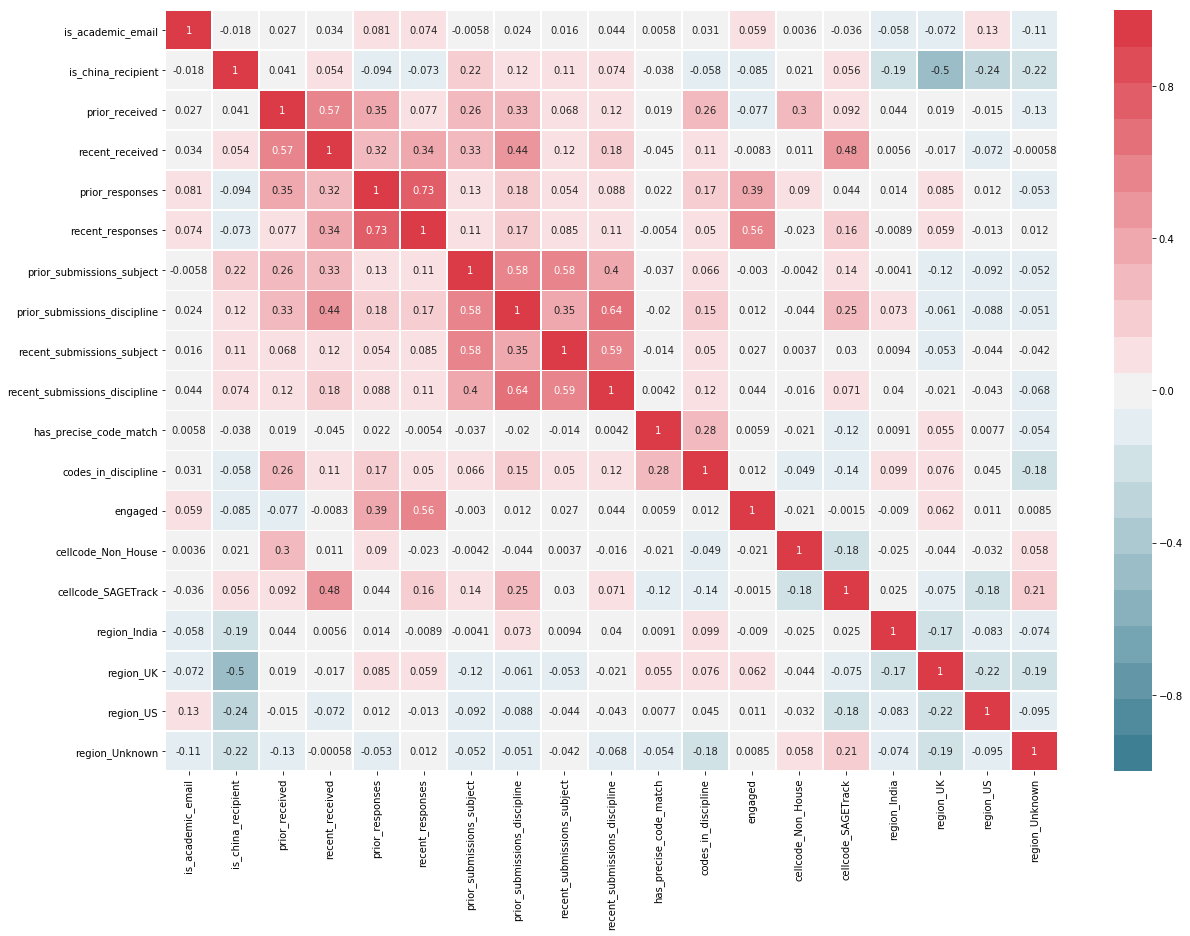

In [7]:
# Visualize correlation
fig, ax = plt.subplots(figsize=(20,14))         
sns.heatmap(engaged.corr(),vmin=-1, vmax=1,cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), linewidths=.5, annot=True, ax=ax);

Small correlation on academic email, stronger correlation on is_responder, is_recent_responder, is_submitter_recent_subject and is_submitter_recent_discipline, strongest correlations on responses and recent_responses

### View relationship of each feature to the target

(While not expecting to see a great deal on binary features)

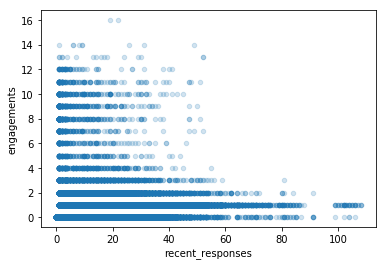

In [30]:
ax = engagements.plot(kind='scatter', x = 'recent_responses', y = 'engagements', alpha =.2)

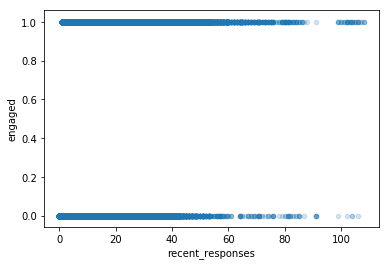

In [31]:
ax = engaged.plot(kind='scatter', x = 'recent_responses', y = 'engaged', alpha =.2)

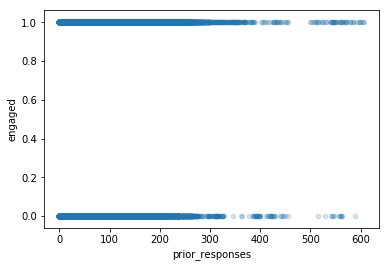

In [34]:
ax = engaged.plot(kind='scatter', x = 'prior_responses', y = 'engaged', alpha =.2)

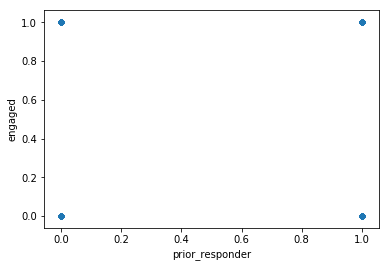

In [35]:
engaged.loc[:, 'prior_responder'] = (engaged.loc[:, 'prior_responses'] > 0).astype(int)
ax = engaged.plot(kind='scatter', x = 'prior_responder', y = 'engaged', alpha =.2)

In [36]:
engaged.loc[:, 'engaged'].groupby(engaged.loc[:, 'prior_responder']).value_counts()

prior_responder  engaged
0                0          118957
                 1            5868
1                0          613730
                 1          193916
Name: engaged, dtype: int64

In part 2, using smaller dataset, prior_respondr = 0 registered no engagements. Wanted to look at this in terms of a larger dataset, as logically insupportable, and there are now values for this group, but the values support this being an unresponseive group (< 5% engagement for responder = 0, c.30% engagement for responder = 1)

As expected, scatter plots not showing a whole lot on the binary features. Responses and recent_responses map better as aren't binary values so may be worth investigating probability. However the scatter for is_responder does indicate that no engagement was made by people who weren't responders ... over a dataset of this size seems to be a strong conclusion that non responders are not a valuable mailing segment

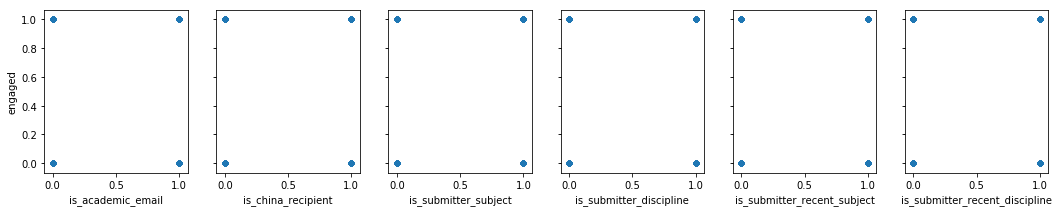

In [18]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 6, sharey=True, figsize=(18, 3))

engagement.plot(kind='scatter', x='is_academic_email', y='engaged', ax=ax0)
engagement.plot(kind='scatter', x='is_china_recipient', y='engaged', ax=ax1)
engagement.plot(kind='scatter', x='is_submitter_subject', y='engaged', ax=ax2)
engagement.plot(kind='scatter', x='is_submitter_discipline', y='engaged', ax=ax3)
engagement.plot(kind='scatter', x='is_submitter_recent_subject', y='engaged', ax=ax4)
engagement.plot(kind='scatter', x='is_submitter_recent_discipline', y='engaged', ax=ax5);

Testing through the other positively correlated binary features, all others have the four-dot pattern (lending credence to signficance of is_responder = 0 as a feature of non-engagement)

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target_col = 'engagements'

X = engagements.drop(target_col, axis='columns')
y = engagements.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LogisticRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.853597748779588

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target_col = 'engaged'

X = engaged.drop(target_col, axis='columns')
y = engaged.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y)

lre = LogisticRegression()

lre.fit(X_train, y_train)
lre.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8625631654355305

In [39]:
y.value_counts(normalize=True)

0    0.785748
1    0.214252
Name: engaged, dtype: float64

Model is showing 85% on engagments, 86% on engaged against 78% actual so in both cases there is more signal from the features than the first pass using mainly flags. As engaged performed slightly better, and for business purposes the fact of engagement is more pertinent than the number of engagements, I shall proceed with the engaged dataset

### Logistic Regression on two features

In [40]:
feature_cols = ['prior_responses', 'recent_responses']
target_col = 'engaged'

X2 = engaged.loc[:, feature_cols]
y2 = engaged.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X2,y2)

lre2 = LogisticRegression()
lre2.fit(X_train, y_train)
lre2.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8403340797364425

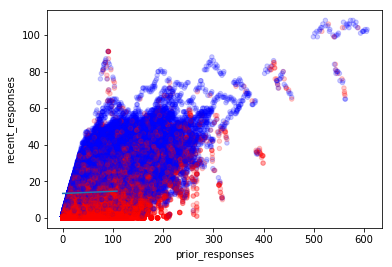

In [41]:
coefs = lre2.coef_[0]
intercept = lre2.intercept_

x_values = np.array([X2.loc[:, 'prior_responses'].min(), X2.loc[:, 'recent_responses'].max()])
y_values = (-1./coefs[1]) * (coefs[0] * x_values + intercept)
colors = np.where(y == 0, 'r', 'b')

ax = X2.plot(kind='scatter', x='prior_responses', y='recent_responses', color=colors, alpha=.2)
ax.plot(x_values, y_values, label='Decision Boundary')
plt.show()

This seems to be defining a conjoined boundary of response and recent responses above which engagement is more probable (though not sure beyond that how it should be interpreted)

### Predict probability for responses and recent_responses

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

feature_cols = ['prior_responses']
target_col = 'engaged'

X3 = engaged.loc[:, feature_cols]
y3 = engaged.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X3,y3)

lr_r = LogisticRegression()

lr_r.fit(X_train, y_train)
lr_r.score(X_test, y_test)


C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8001698710524284

In [43]:
y_pred_prob = lr_r.predict_proba(X_test)

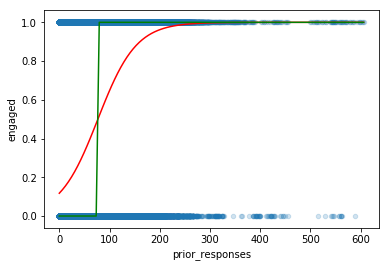

In [44]:
x_grid = np.linspace(start=engaged.loc[:, 'prior_responses'].min(), stop=engaged.loc[:, 'prior_responses'].max(), num=100)
pred_probs = lr_r.predict_proba(x_grid.reshape(-1, 1))[:, 1]
preds = lr_r.predict(x_grid.reshape(-1, 1))
ax = engaged.plot(kind='scatter', x='prior_responses', y='engaged', alpha=.2)
ax.plot(x_grid, pred_probs, c='r')
ax.plot(x_grid, preds, c='g');

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

feature_cols = ['recent_responses']
target_col = 'engaged'

X4 = engaged.loc[:, feature_cols]
y4 = engaged.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X4,y4)

lr_rr = LogisticRegression()

lr_rr.fit(X_train, y_train)
lr_rr.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8430580221175542

In [46]:
y_pred_prob = lr_rr.predict_proba(X_test)

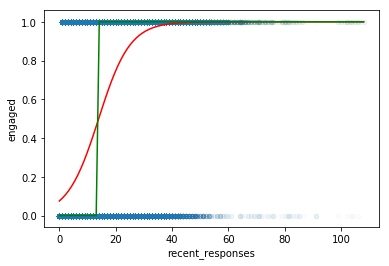

In [48]:
x_grid = np.linspace(start=engaged.loc[:, 'recent_responses'].min(), stop=engaged.loc[:, 'recent_responses'].max(), num=100)
pred_probs = lr_rr.predict_proba(x_grid.reshape(-1, 1))[:, 1]
preds = lr_rr.predict(x_grid.reshape(-1, 1))
ax = engaged.plot(kind='scatter', x='recent_responses', y='engaged', alpha=.02)
ax.plot(x_grid, pred_probs, c='r')
ax.plot(x_grid, preds, c='g');

Seems that approximately 10 recent responses indicate a >50% chance of engagement, likewise c. 66 total prior responses indicate a > 50% chance of engagement

### Test accuracy, recall and precision of recent_responses

In [53]:
from sklearn import metrics

y_pred = lr_rr.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[174249,   9158],
       [ 27428,  22283]], dtype=int64)

In [62]:
#Accuracy
(22581 + 174159) / (22581 + 174159 + 9189 + 27189)

0.8439502741101074

In [32]:
#Precision
2577 / (2577 + 1267)

0.6703954214360042

In [33]:
#Recall
2577 / (2577 + 6689)

0.2781135333477229

In [54]:
print('precision:', metrics.precision_score(y_test, y_pred))
print('recall:', metrics.recall_score(y_test, y_pred))

precision: 0.7087242772176457
recall: 0.4482508901450383


So... bringing in the counts over the flags has improved the model. Overall LR model is now showing 78-86% versus 80-84% so getting more signal from the features/increased dataset

likewise, precision and recall have both improved, p 67 - 70%, r 27 - 45 % (recall more)

In [63]:
feature_cols = ['recent_responses']
target_col = 'engaged'

X4 = engaged.loc[:, feature_cols]
y4 = engaged.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X4,y4)

lr_rr = LogisticRegression()

lr_rr.fit(X_train, y_train)
lr_rr.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8427277172933879

In [64]:
y_pred_prob = lr_rr.predict_proba(X_test)

In [72]:
y_pred_prob = lr_rr.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.45543458, 0.07503313, 0.16596686, ..., 0.98414848, 0.07503313,
       0.08847818])

In [74]:
from sklearn import metrics

for threshold in np.linspace(y_pred_prob.min(), y_pred_prob.max(), 10):
    y_pred_thresh = y_pred_prob > threshold
    print('threshold:', threshold)
    print('precision:', metrics.precision_score(y_test, y_pred_thresh))
    print('recall:', metrics.recall_score(y_test, y_pred_thresh))
    print('f1:', metrics.f1_score(y_test, y_pred_thresh))
    print('f2:', metrics.fbeta_score(y_test, y_pred_thresh, 2))
    print('f1/2:', metrics.fbeta_score(y_test, y_pred_thresh, .5))
    print()

threshold: 0.07503312898817245
precision: 0.34048939552080987
recall: 1.0
f1: 0.5080075928366776
f2: 0.7207779642268157
f1/2: 0.3922246600489102

threshold: 0.17780721827257495
precision: 0.5485678340501478
recall: 0.7513022920339798
f1: 0.6341253065020717
f2: 0.6995925464355277
f1/2: 0.5798623138205751

threshold: 0.28058130755697747
precision: 0.6242250083649891
recall: 0.6354183362718384
f1: 0.6297719397531746
f2: 0.6331476712383463
f1/2: 0.6264320139053489

threshold: 0.3833553968413799
precision: 0.6827352211927443
recall: 0.524102420259657
f1: 0.5929930746823535
f2: 0.549644272428907
f1/2: 0.6437648888626385

threshold: 0.48612948612578244
precision: 0.7102682113950166
recall: 0.4483290591440936
f1: 0.5496886399646266
f2: 0.48403005801352345
f1/2: 0.635955937521315

threshold: 0.588903575410185
precision: 0.7327062512247697
recall: 0.374559224234653
f1: 0.49571108489002613
f2: 0.4151436959003033
f1/2: 0.6150804095491273

threshold: 0.6916776646945875
precision: 0.7540222438181622

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.0
f2: 0.0
f1/2: 0.0



C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Things to try next

Play with f-beta on pr & rr features
Try RFC on whole dataset
?


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
0.9962937171928912
0.8499643957137587


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100) #, oob_score=True)

rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9962779883692499
0.8781303889017579


In [ ]:
### Generate prior and recent response rates

In [8]:
engaged.loc[:, 'prior_response_rate'] = (engaged.loc[:, 'prior_responses'] / engaged.loc[:, 'prior_received']).astype(float)

In [9]:
engaged.loc[:, 'prior_response_rate']

0         0.047619
1         0.000000
2         0.000000
3         0.096774
4         0.920000
5         0.512077
6         0.309735
7         0.277778
8         0.000000
9         0.036145
10        0.222222
11        0.440415
12        0.131148
13        0.021978
14        0.000000
15        0.200000
16        0.132353
17        0.000000
18        0.000000
19        0.018182
20        0.571429
21        0.082474
22        0.039216
23        0.162162
24        0.138889
25        0.544304
26        0.492857
27        0.405797
28        0.037634
29        0.948454
            ...   
932441    0.055556
932442    0.330000
932443    0.023622
932444    0.007463
932445    0.019465
932446    0.012048
932447    0.043478
932448    0.464286
932449    0.967742
932450    0.000000
932451    0.064516
932452    0.000000
932453    0.000000
932454    0.010274
932455    0.642241
932456    0.297101
932457    0.020408
932458    0.073394
932459    0.014085
932460    0.944444
932461    0.426087
932462    0.

In [10]:
engaged.loc[:, 'recent_response_rate'] = (engaged.loc[:, 'recent_responses'] / engaged.loc[:, 'recent_received']).astype(float)

In [19]:
engaged.loc[:, 'prior_response_rate'] = engaged.loc[:, 'prior_response_rate'].fillna(0)

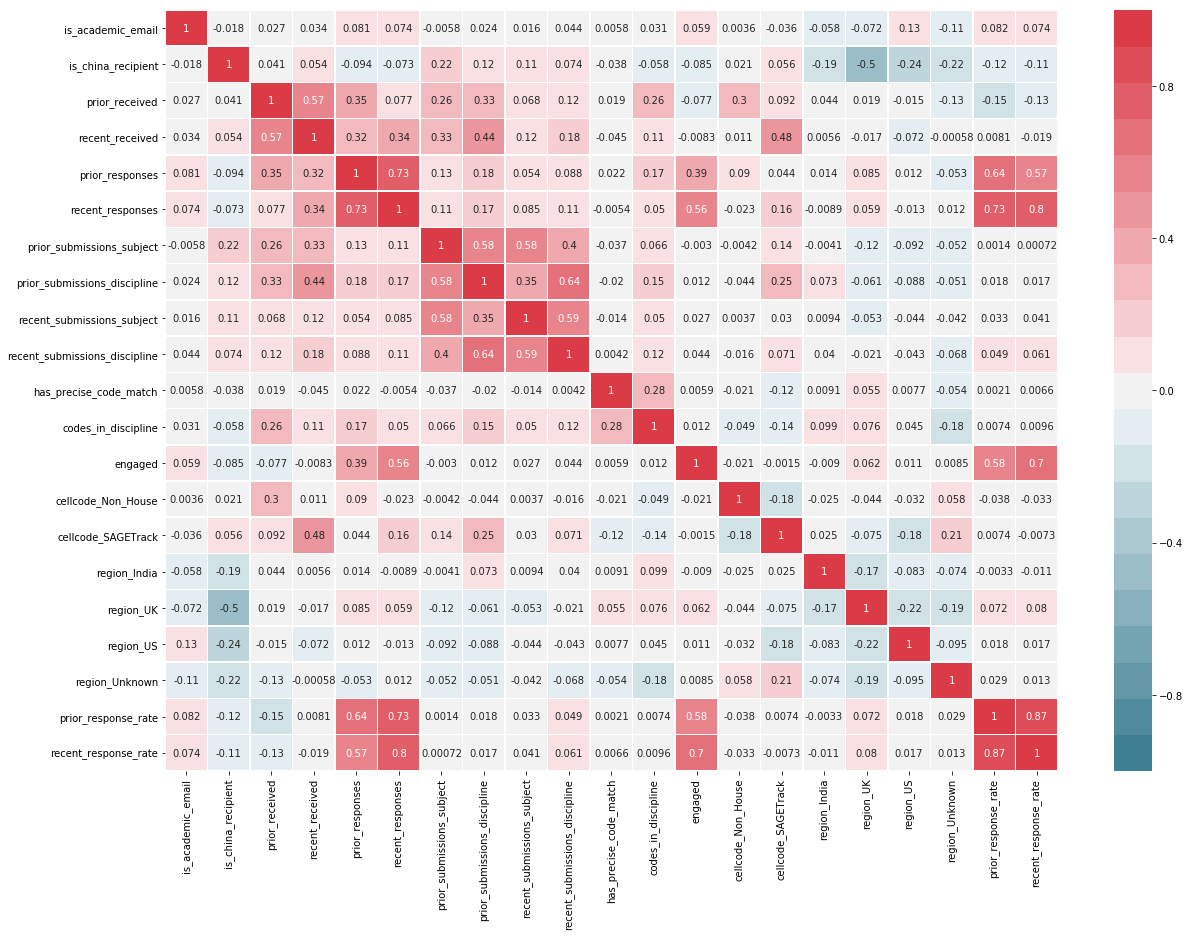

In [20]:
fig, ax = plt.subplots(figsize=(20,14))         
sns.heatmap(engaged.corr(),vmin=-1, vmax=1,cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), linewidths=.5, annot=True, ax=ax);

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target_col = 'engaged'

X = engaged.drop(target_col, axis='columns')
y = engaged.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y)

lre = LogisticRegression()

lre.fit(X_train, y_train)
lre.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8790869859899278

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=7)

dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

0.8831934659606808
0.8825187244228245


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=13) #, oob_score=True)

rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.8926193210009823
0.8867912387717808


In [ ]:
md 5 - 0.8758 / 0.8750
md 10 - 0.8845 /0.8827
md 15 - 0.900 / 0.8866
md 12 - 0.8896 / 0.8846
md 13 - 0.8926 / 0.8867

### feature selection attempt 1

In [31]:
# pick 3 lowest correlating features, remove and rerun

engaged_fs = engaged.drop(['cellcode_SAGETrack', 'has_precise_code_match', 'prior_responses'], axis='columns')

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target_col = 'engaged'

X = engaged_fs.drop(target_col, axis='columns')
y = engaged_fs.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y)

lre = LogisticRegression()

lre.fit(X_train, y_train)
lre.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8778129530967149

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=7)

dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

0.8828560111989224
0.8830506438799235


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, oob_score=True) # max_depth=12, 

rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.995923374890792
0.880940124743692


In [35]:
y.value_counts(normalize=True)

0    0.785748
1    0.214252
Name: engaged, dtype: float64

In [39]:
#RandomForestClassifier?
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    ["criterion='gini'", "splitter='best'", 'max_depth=None', 'min_samples_split=2', 'min_samples_leaf=1', 'min_weight_fraction_leaf=0.0', 'max_features=None', 'random_state=None', 'max_leaf_nodes=None', 'min_impurity_decrease=0.0', 'min_impurity_split=None', 'class_weight=None', 'presort=False'],
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : string, optional (default="gini")
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : string, optional (default="best")
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves ar

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [40]:
dtc.feature_importances_

array([7.87289574e-05, 3.45684849e-04, 1.13798117e-02, 1.32522326e-04,
       2.42956158e-04, 3.30723804e-05, 3.04222667e-05, 2.92189532e-05,
       0.00000000e+00, 2.36409819e-04, 0.00000000e+00, 1.46607465e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.44562345e-02,
       9.53033472e-01])

In [43]:
print(dict(zip(engaged.columns, dtc.feature_importances_)))

{'is_academic_email': 7.872895735340259e-05, 'is_china_recipient': 0.00034568484868588456, 'prior_received': 0.011379811731073709, 'recent_received': 0.0001325223257835438, 'prior_responses': 0.0002429561579044525, 'recent_responses': 3.307238043614014e-05, 'prior_submissions_subject': 3.042226671543932e-05, 'prior_submissions_discipline': 2.9218953234189496e-05, 'recent_submissions_subject': 0.0, 'recent_submissions_discipline': 0.00023640981933919394, 'has_precise_code_match': 0.0, 'codes_in_discipline': 1.4660746462897716e-06, 'engaged': 0.0, 'cellcode_Non_House': 0.0, 'cellcode_SAGETrack': 0.0, 'region_India': 0.03445623450686125, 'region_UK': 0.9530334719779664}


In [46]:
sorted(zip(dtc.feature_importances_, X.columns))[::-1]

[(0.9530334719779664, 'recent_response_rate'),
 (0.03445623450686125, 'prior_response_rate'),
 (0.011379811731073709, 'prior_received'),
 (0.00034568484868588456, 'is_china_recipient'),
 (0.0002429561579044525, 'recent_responses'),
 (0.00023640981933919394, 'codes_in_discipline'),
 (0.0001325223257835438, 'recent_received'),
 (7.872895735340259e-05, 'is_academic_email'),
 (3.307238043614014e-05, 'prior_submissions_subject'),
 (3.042226671543932e-05, 'prior_submissions_discipline'),
 (2.9218953234189496e-05, 'recent_submissions_subject'),
 (1.4660746462897716e-06, 'region_India'),
 (0.0, 'region_Unknown'),
 (0.0, 'region_US'),
 (0.0, 'region_UK'),
 (0.0, 'recent_submissions_discipline'),
 (0.0, 'cellcode_Non_House')]

In [47]:
sorted(zip(rfc.feature_importances_, X.columns))[::-1]

[(0.2744223872875974, 'recent_response_rate'),
 (0.25443499858648344, 'prior_response_rate'),
 (0.18023758574951013, 'recent_responses'),
 (0.13190634509120566, 'prior_received'),
 (0.05344778221903103, 'recent_received'),
 (0.02756727377418554, 'codes_in_discipline'),
 (0.024031122780490955, 'prior_submissions_discipline'),
 (0.009927462372534876, 'is_academic_email'),
 (0.009421933764444092, 'prior_submissions_subject'),
 (0.007404331045863015, 'recent_submissions_discipline'),
 (0.00671278551208908, 'region_UK'),
 (0.00633079947317784, 'is_china_recipient'),
 (0.004217537023598594, 'region_US'),
 (0.0034341426646960715, 'region_India'),
 (0.003187656446113445, 'region_Unknown'),
 (0.002017901049556974, 'recent_submissions_subject'),
 (0.00129795515942166, 'cellcode_Non_House')]

Re-try this with removed features reincluded...

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target_col = 'engaged'

Xff = engaged.drop(target_col, axis='columns')
yff = engaged.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(Xff,yff)

lreff = LogisticRegression()

lreff.fit(X_train, y_train)
lreff.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8783706105920607

In [52]:
X_train, X_test, y_train, y_test = train_test_split(Xff,yff)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=7)

dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

0.8843345206212028
0.8831578857059514


In [54]:
sorted(zip(dtc.feature_importances_, Xff.columns))[::-1]

[(0.9455985011967162, 'recent_response_rate'),
 (0.031576822781094915, 'prior_response_rate'),
 (0.011272601449159654, 'prior_received'),
 (0.00737547590992723, 'prior_responses'),
 (0.00268648329936437, 'recent_received'),
 (0.0008313015595847722, 'codes_in_discipline'),
 (0.00038479014248028216, 'is_china_recipient'),
 (7.657775157561728e-05, 'is_academic_email'),
 (6.734787337032297e-05, 'recent_responses'),
 (5.526687980502991e-05, 'prior_submissions_discipline'),
 (4.847581603906024e-05, 'prior_submissions_subject'),
 (1.638086879478149e-05, 'recent_submissions_subject'),
 (8.9862282089481e-06, 'recent_submissions_discipline'),
 (9.882438788634e-07, 'region_Unknown'),
 (0.0, 'region_US'),
 (0.0, 'region_UK'),
 (0.0, 'region_India'),
 (0.0, 'has_precise_code_match'),
 (0.0, 'cellcode_SAGETrack'),
 (0.0, 'cellcode_Non_House')]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(Xff,yff)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth=12)

rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.8894220801226276
0.8853928053603755


In [56]:
sorted(zip(rfc.feature_importances_, Xff.columns))[::-1]

[(0.4860286822026149, 'recent_response_rate'),
 (0.23392297011899438, 'recent_responses'),
 (0.1439540734925483, 'prior_response_rate'),
 (0.08170338430679681, 'prior_responses'),
 (0.019970600020806764, 'recent_received'),
 (0.01673698283567771, 'prior_received'),
 (0.003098203282205326, 'is_china_recipient'),
 (0.002853719022016702, 'prior_submissions_discipline'),
 (0.0024549128318605003, 'codes_in_discipline'),
 (0.0018344081540951126, 'cellcode_SAGETrack'),
 (0.0015709366000203856, 'recent_submissions_discipline'),
 (0.0013929421368241227, 'prior_submissions_subject'),
 (0.0012321673079306148, 'region_UK'),
 (0.0012036196633405688, 'is_academic_email'),
 (0.000584446238419844, 'recent_submissions_subject'),
 (0.00033438864175465606, 'region_India'),
 (0.0003223791965349066, 'region_US'),
 (0.0002975023005387726, 'has_precise_code_match'),
 (0.00026096393107280324, 'region_Unknown'),
 (0.00024271771594689486, 'cellcode_Non_House')]

### Test how models change with response rates retained and response numbers removed (wondering how co-correlation comes into effect)

In [57]:
engaged_trimmed = engaged.drop(['recent_responses','prior_responses'], axis='columns')

In [58]:
target_col = 'engaged'

X_trim = engaged_trimmed.drop(target_col, axis='columns')
y_trim = engaged_trimmed.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X_trim,y_trim)

lr_trim = LogisticRegression()

lr_trim.fit(X_train, y_train)
lr_trim.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.878735232800556

In [60]:
dtc_trim = DecisionTreeClassifier(max_depth=7)

dtc_trim.fit(X_train, y_train)
print(dtc_trim.score(X_train, y_train))
print(dtc_trim.score(X_test, y_test))

0.8832277833940799
0.883247968839815


In [61]:
sorted(zip(dtc_trim.feature_importances_, X_trim.columns))[::-1]

[(0.9512592589521726, 'recent_response_rate'),
 (0.030191452586031547, 'prior_response_rate'),
 (0.017123709011974693, 'prior_received'),
 (0.0006231078616797187, 'recent_received'),
 (0.00046178194904158564, 'codes_in_discipline'),
 (0.00017852123512867682, 'is_china_recipient'),
 (6.037147551429369e-05, 'is_academic_email'),
 (5.295060643781091e-05, 'prior_submissions_subject'),
 (2.262665245233154e-05, 'prior_submissions_discipline'),
 (2.225193715398858e-05, 'recent_submissions_subject'),
 (2.4410476522023965e-06, 'cellcode_SAGETrack'),
 (1.5266847605386049e-06, 'region_India'),
 (0.0, 'region_Unknown'),
 (0.0, 'region_US'),
 (0.0, 'region_UK'),
 (0.0, 'recent_submissions_discipline'),
 (0.0, 'has_precise_code_match'),
 (0.0, 'cellcode_Non_House')]

In [62]:
rfc_trim = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth=12)

rfc_trim.fit(X_train, y_train)
print(rfc_trim.score(X_train, y_train))
print(rfc_trim.score(X_test, y_test))

0.8861075880134924
0.8826731526523048


In [63]:
sorted(zip(rfc_trim.feature_importances_, X_trim.columns))[::-1]

[(0.6444458407206183, 'recent_response_rate'),
 (0.30985725306153084, 'prior_response_rate'),
 (0.015601852554621298, 'prior_received'),
 (0.009030892027442429, 'recent_received'),
 (0.004182106052120746, 'is_china_recipient'),
 (0.002684965572792472, 'prior_submissions_discipline'),
 (0.0025547183100004985, 'codes_in_discipline'),
 (0.002475653531220384, 'recent_submissions_discipline'),
 (0.002364151268608372, 'is_academic_email'),
 (0.002122586365563806, 'region_UK'),
 (0.001408913596386583, 'prior_submissions_subject'),
 (0.000849157591678203, 'cellcode_SAGETrack'),
 (0.0007988675556764142, 'recent_submissions_subject'),
 (0.00042089067011571025, 'region_India'),
 (0.0003363117218116219, 'has_precise_code_match'),
 (0.00033076614815409394, 'region_US'),
 (0.000293256064970256, 'cellcode_Non_House'),
 (0.00024181718668822208, 'region_Unknown')]

In [ ]:
Slightly better R2 scores for LR on the trimmed data, slightly worse R2 scores for DTC and RFC R2 scores... but very slight (< 0.5%) so worth retaining (?)

### Test how models change with response rates retained and delivered numbers removed (wondering how co-correlation comes into effect)

In [64]:
engaged_t2 = engaged.drop(['recent_responses','prior_responses'], axis='columns')

In [65]:
target_col = 'engaged'

X_t2 = engaged_trimmed.drop(target_col, axis='columns')
y_t2 = engaged_trimmed.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X_t2,y_t2)

lr_t2 = LogisticRegression()

lr_t2.fit(X_train, y_train)
lr_t2.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8791684897777091

In [66]:
dtc_t2 = DecisionTreeClassifier(max_depth=7)

dtc_t2.fit(X_train, y_train)
print(dtc_t2.score(X_train, y_train))
print(dtc_t2.score(X_test, y_test))

0.8823355301257019
0.8826860216714282


In [67]:
rfc_t2 = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth=12)

rfc_t2.fit(X_train, y_train)
print(rfc_t2.score(X_train, y_train))
print(rfc_t2.score(X_test, y_test))

0.8858044506851332
0.8833423416467197


### APAC only segment

In [36]:
engagement_raw = pd.read_csv('engagement_full.csv')

In [37]:
engaged = engagement_raw.drop(['email','launch_id', 'date_launched', 'engagements'], axis='columns')

In [38]:
engaged_apac = engaged.loc[engaged.loc[:, 'region'] == 'APAC']

In [39]:
engaged_apac.shape

(425408, 15)

In [40]:
engaged_row = engaged.loc[engaged.loc[:, 'region'] != 'APAC']

In [41]:
engaged_row.shape

(507063, 15)

In [42]:
engaged_apac = engaged_apac.drop('region', axis='columns')

In [43]:
engaged_row = engaged_row.drop('region', axis='columns')

In [15]:
engaged_apac = pd.get_dummies(engaged_apac, drop_first=True)

In [44]:
engaged_row = pd.get_dummies(engaged_row, drop_first=True)

In [45]:
engaged_apac.loc[:, 'recent_response_rate'] = (engaged_apac.loc[:, 'recent_responses'] / engaged_apac.loc[:, 'recent_received']).astype(float)

In [46]:
engaged_row.loc[:, 'recent_response_rate'] = (engaged_row.loc[:, 'recent_responses'] / engaged_row.loc[:, 'recent_received']).astype(float)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target_col = 'engaged'

#X_apac = engaged_apac.loc[:, ['recent_response_rate']]
X_apac = engaged_apac.loc[:, ['recent_responses']]
y_apac = engaged_apac.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X_apac,y_apac)

lr_apac = LogisticRegression()

lr_apac.fit(X_train, y_train)
lr_apac.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8568997292011433

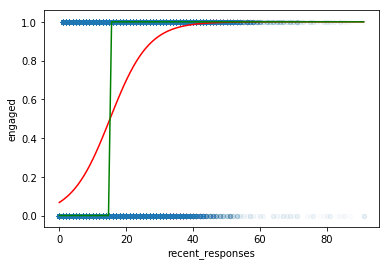

In [53]:
y_pred_prob_a = lr_apac.predict_proba(X_test)

x_grid = np.linspace(start=engaged_apac.loc[:, 'recent_responses'].min(), stop=engaged_apac.loc[:, 'recent_responses'].max(), num=100)
pred_probs = lr_apac.predict_proba(x_grid.reshape(-1, 1))[:, 1]
preds = lr_apac.predict(x_grid.reshape(-1, 1))
ax = engaged_apac.plot(kind='scatter', x='recent_responses', y='engaged', alpha=.02)
ax.plot(x_grid, pred_probs, c='r')
ax.plot(x_grid, preds, c='g');

In [55]:
target_col = 'engaged'

#X_row = engaged_row.loc[:, ['recent_response_rate']]
X_row = engaged_row.loc[:, ['recent_responses']]
y_row = engaged_row.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X_row,y_row)

lr_row = LogisticRegression()

lr_row.fit(X_train, y_train)
lr_row.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8287474559424451

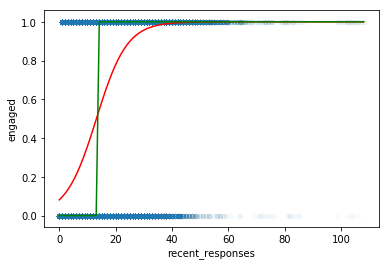

In [56]:
#y_pred_prob_r = lr_row.predict_proba(X_test)

x_grid = np.linspace(start=engaged_row.loc[:, 'recent_responses'].min(), stop=engaged_row.loc[:, 'recent_responses'].max(), num=100)
pred_probs = lr_row.predict_proba(x_grid.reshape(-1, 1))[:, 1]
preds = lr_row.predict(x_grid.reshape(-1, 1))
ax = engaged_row.plot(kind='scatter', x='recent_responses', y='engaged', alpha=.02)
ax.plot(x_grid, pred_probs, c='r')
ax.plot(x_grid, preds, c='g');

In [50]:
engaged_row.shape

(507063, 18)

In [35]:
engaged_apac.shape

(425408, 18)